In [4]:
!pip install snowflake-connector-python

In [6]:
import snowflake.connector

In [8]:
con = snowflake.connector.connect(
    user='shivamgulia',
    password='Ssjn.mrt10',
    account='adbcdzz-ro98064',
    warehouse='COMPUTE_WH',
    schema='SURVEYDATA',
    database='SURVEY'
)

In [10]:
cursor = con.cursor()

In [12]:
data = cursor.execute('SELECT * FROM CLEANEDDATA;').fetchall()

In [16]:
type(data)

list

In [18]:
columns = ['CUSTOMER', 'OVERALLSATISFACTION', 'FOODQUALITY', 'SPEEDSATISFACTION', 'ORDERACCURACY']

In [22]:
df = pd.DataFrame(data, columns=columns)

In [24]:
df

,CUSTOMER,OVERALLSATISFACTION,FOODQUALITY,SPEEDSATISFACTION,ORDERACCURACY
0,1,5.000,3.000,4.000,True
1,2,3.000,4.000,3.000,True
2,3,4.000,5.000,2.000,True
3,4,5.000,3.000,4.000,True
4,5,2.000,5.000,1.000,True
...,...,...,...,...,...
10611,10612,4.000,2.000,3.000,True
10612,10613,3.000,3.000,3.000,True
10613,10614,5.000,3.000,3.000,True
10614,10615,3.000,3.000,3.000,True


In [28]:
df.to_csv('cleaneddata.csv', index=False)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace 'your_data.csv' with the path to your CSV file)
# df = pd.read_csv('Customer-survey-data.csv')

# Drop any rows with missing values in relevant columns
df = df.dropna(subset=['FOODQUALITY', 'SPEEDSATISFACTION', 'OVERALLSATISFACTION'])

# Calculate correlations
correlation_matrix = df[['FOODQUALITY', 'SPEEDSATISFACTION', 'OVERALLSATISFACTION']].corr()


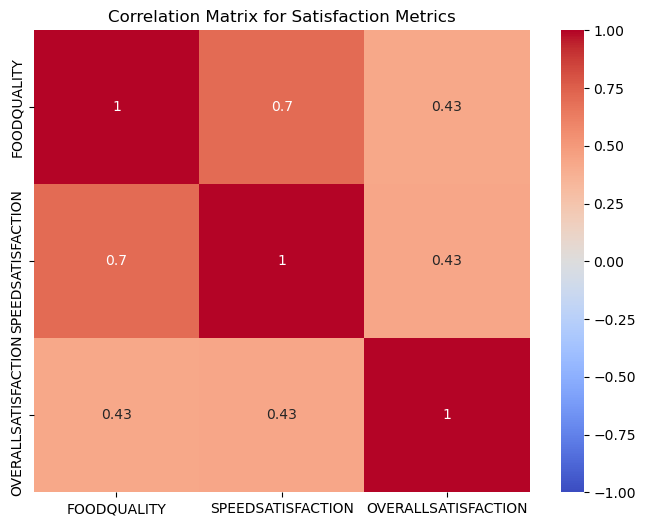

In [38]:
# Plot 2: Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Satisfaction Metrics")
plt.show()

In [100]:
count_columns = [1, 2, 3, 4, 5]
foodcount = df.groupby('FOODQUALITY').count()['CUSTOMER']
listfoodcount= foodcount.to_list()

Text(0, 0.5, 'Count')

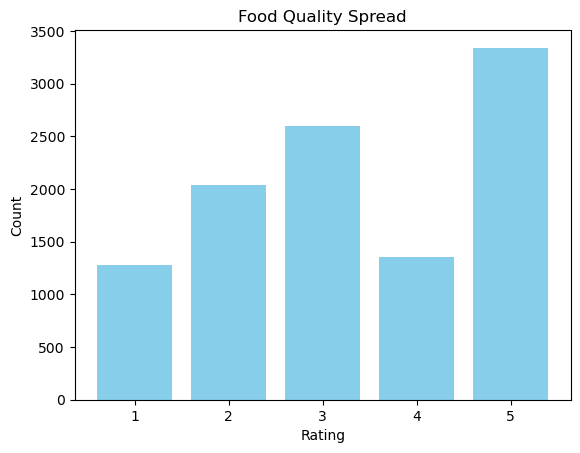

In [76]:
plt.bar(count_columns, listfoodcount, color='skyblue')
plt.title('Food Quality Spread')
plt.xlabel('Rating')
plt.ylabel('Count')

In [86]:
speed_count = df.groupby('SPEEDSATISFACTION').count()['CUSTOMER']
listspeedcount= speed_count.to_list()

Text(0, 0.5, 'Count')

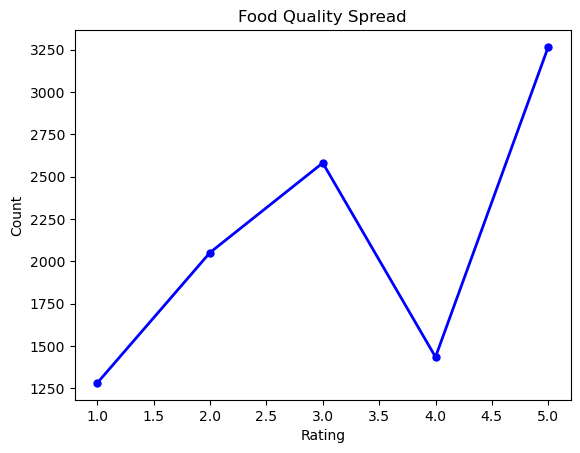

In [96]:
# plt.bar(count_columns, listspeedcount, color='skyblue')
plt.plot(count_columns, listspeedcount, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Food Quality Spread')
plt.xlabel('Rating')
plt.ylabel('Count')

In [116]:
overall_count = df.groupby('OVERALLSATISFACTION').count()['CUSTOMER']
overallcountlist= overall_count.to_list()

Text(0, 0.5, 'Count')

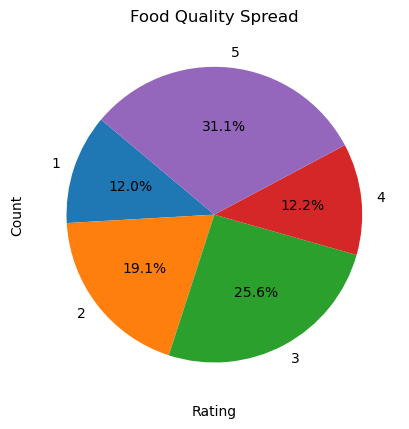

In [118]:
# plt.bar(count_columns, overallcountlist, color='skyblue')
plt.pie(overallcountlist, labels=count_columns,  autopct='%1.1f%%', startangle=140)
plt.title('Food Quality Spread')
plt.xlabel('Rating')
plt.ylabel('Count')

In [120]:
accuracy_count = df.groupby('ORDERACCURACY').count()['CUSTOMER']
accuracycountlist= accuracy_count.to_list()

Text(0, 0.5, 'Count')

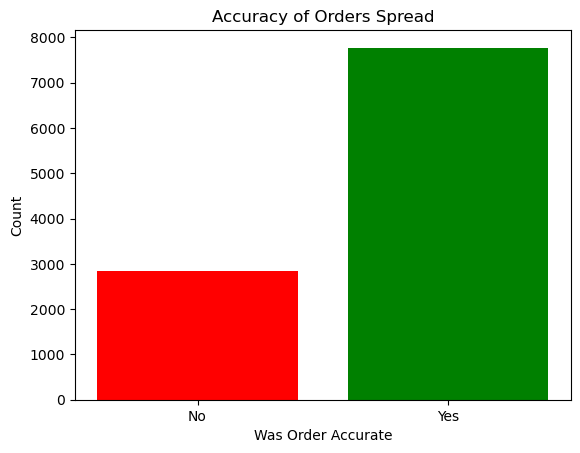

In [128]:
plt.bar(["No", "Yes"], accuracycountlist, color=['red', 'green'])
plt.title('Accuracy of Orders Spread')
plt.xlabel('Was Order Accurate')
plt.ylabel('Count')